In [1]:
!pip install librosa


  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=f3db0b5ed730c57ea49baed448124079bbb7dba69a49eca9f3a6624049e49f50
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=752d69bff3dc6e67972654e0c3cfdb751f796573641ed0f43ca847f4da5ba6d5
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
Successfully built resampy audioread


In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
filename= 'B_TIG01_EU_FN_GIU01_201.wav'

In [13]:
import IPython.display as ipd
import librosa
import librosa.display

In [14]:
## reading a sample audio using librosa
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
print(librosa_audio_data)

[1.8394549e-04 1.3996716e-04 5.1123124e-08 ... 2.9759272e-04 1.0348492e-04
 0.0000000e+00]


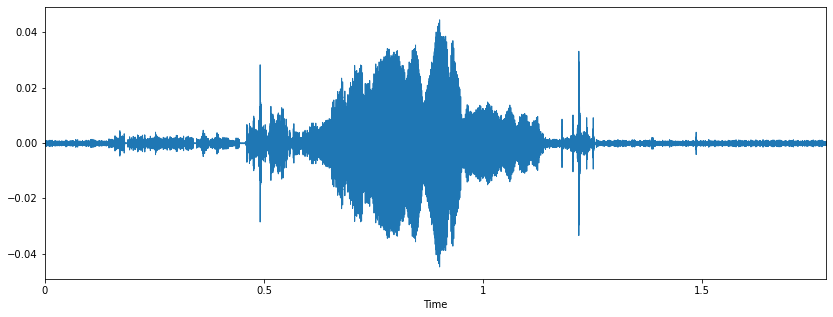

In [15]:
#Brushing sound
plt.figure(figsize=(14,5))
datas,sample_rate=librosa.load(filename)
librosa.display.waveplot(datas,sr=sample_rate)
ipd.Audio(filename)

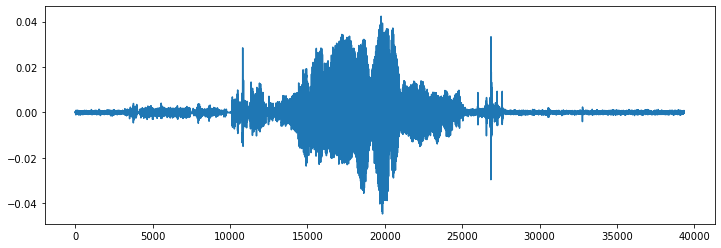

In [16]:
## plot the librosa audio data
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [17]:
import pandas as pd
metadata= pd.read_csv('ML project\data\metadata.csv')
metadata.head()


,slice_file_name,classID,class
0,B_ANI01_MC_FN_SIM01_101.wav,1,brushing
1,B_ANI01_MC_FN_SIM01_102.wav,1,brushing
2,B_ANI01_MC_FN_SIM01_103.wav,1,brushing
3,B_ANI01_MC_FN_SIM01_301.wav,1,brushing
4,B_ANI01_MC_FN_SIM01_302.wav,1,brushing


In [18]:
##check wheter the dataset is imbalanced
metadata['class'].value_counts()

isolation           221
brushing            127
waiting_for_food     92
Name: class, dtype: int64

In [19]:
##extracting features using MFCC for every audio file
import pandas as pf
import os
import librosa

audio_data_path= 'ML project\data\dataset'
metadata= pd.read_csv('ML project\data\metadata.csv')


In [20]:
def features_extractor(file):
    audio,sample_rate= librosa.load(file_name,res_type = 'kaiser_fast')
    mfcss_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features= np.mean(mfcss_features.T,axis=0)
    
    return mfccs_scaled_features

In [97]:
import numpy as np
from tqdm import tqdm

#Now we iterate through every audio file and extract features using MFCC
extracted_features=[]
for index_num, row in tqdm (metadata.iterrows()):
    file_name= os.path.join(os.path.abspath(audio_data_path),str(row["slice_file_name"]))
    final_class_label=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_label])

440it [00:14, 31.34it/s]


In [98]:
## converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-396.81778, 136.41545, -74.92035, -11.478852,...",brushing
1,"[-542.6039, 158.09341, -73.43401, -11.935203, ...",brushing
2,"[-517.51764, 142.89006, -69.55315, -7.46689, 3...",brushing
3,"[-476.4709, 112.17069, -65.29729, -10.651881, ...",brushing
4,"[-511.12573, 135.90286, -62.427002, -11.154292...",brushing


In [99]:
## Split dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [25]:
X.shape

(440, 40)

In [93]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [100]:
## Label encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [103]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [28]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
X_train.shape

(352, 40)

In [30]:
X_train

array([[-6.2651703e+02,  1.6675206e+02, -6.2472973e+01, ...,
         2.3507240e+00, -3.9628022e+00,  2.5059193e-01],
       [-5.0628857e+02,  1.0420370e+02, -4.1188686e+01, ...,
        -9.5325756e-01, -7.8021437e-01,  1.8900108e-01],
       [-5.1112573e+02,  1.3590286e+02, -6.2427002e+01, ...,
         1.0814322e+00, -1.2478454e+00,  1.6497887e+00],
       ...,
       [-3.6755038e+02,  1.4404439e+02, -5.6834351e+01, ...,
        -1.2404530e+00,  6.7717478e-02,  1.7579875e+00],
       [-6.1116144e+02,  1.7776347e+02, -8.5178993e+01, ...,
         1.7360479e+00, -2.4014084e+00,  1.2079458e+00],
       [-6.3292749e+02,  1.7310408e+02, -7.4483101e+01, ...,
         4.9773377e-01, -8.7558186e-01,  1.2513393e+00]], dtype=float32)

In [31]:
X_test.shape

(88, 40)

In [32]:
X_test

array([[-5.51194153e+02,  1.30571091e+02, -6.97639389e+01, ...,
         1.19552922e+00,  5.23097157e-01,  3.84192538e+00],
       [-3.70140533e+02,  1.14199348e+02, -5.82798729e+01, ...,
         3.20071757e-01, -3.37360764e+00, -3.27493191e+00],
       [-5.24417542e+02,  1.13680504e+02, -4.87653732e+01, ...,
         1.40203679e+00, -1.61289763e+00,  1.46254337e+00],
       ...,
       [-5.04581604e+02,  1.52437546e+02, -6.87483292e+01, ...,
         1.90740097e+00, -9.52052712e-01, -7.94477761e-02],
       [-5.25529846e+02,  1.48850098e+02, -6.05766029e+01, ...,
        -9.45907116e-01, -3.84938812e+00,  2.24521613e+00],
       [-5.62459290e+02,  1.56093781e+02, -8.89175720e+01, ...,
         8.41846824e-01, -1.29717422e+00,  7.07806587e-01]], dtype=float32)

In [33]:
y_train.shape

(352, 3)

In [34]:
y_train

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [35]:
y_test.shape

(88, 3)

In [36]:
## using tensorflowwww
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [37]:
## Number of classes
num_labels=y.shape[1]

In [39]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### last layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [62]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [79]:
## Training the model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs= 1000
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='save_models/audio_classification.hdf5',verbose=1,save_best_only=True)
start=datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test,y_test), callbacks= [checkpointer])


duration = datetime.now()- start
print("Training completed in time: ", duration)

Epoch 1/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5865 - accuracy: 0.7500
Epoch 00001: val_loss improved from inf to 1.57877, saving model to save_models\audio_classification.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.7045 - val_loss: 1.5788 - val_accuracy: 0.6591
Epoch 2/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4518 - accuracy: 0.6875
Epoch 00002: val_loss did not improve from 1.57877
11/11 [==============================] - 0s 3ms/step - loss: 0.5724 - accuracy: 0.6903 - val_loss: 1.9853 - val_accuracy: 0.6705
Epoch 3/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5270 - accuracy: 0.6875
Epoch 00003: val_loss improved from 1.57877 to 1.37577, saving model to save_models\audio_classification.hdf5
11/11 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6903 - val_loss: 1.3758 - val_accuracy: 0.6477
Epoch 4/1000
 1/11 [=>............................] - ETA:

 1/11 [=>............................] - ETA: 0s - loss: 0.4058 - accuracy: 0.9062
Epoch 00030: val_loss did not improve from 1.37577
11/11 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7017 - val_loss: 2.0195 - val_accuracy: 0.6818
Epoch 31/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7035 - accuracy: 0.5625
Epoch 00031: val_loss did not improve from 1.37577
11/11 [==============================] - 0s 3ms/step - loss: 0.5854 - accuracy: 0.6733 - val_loss: 2.4960 - val_accuracy: 0.6818
Epoch 32/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5306 - accuracy: 0.6250
Epoch 00032: val_loss did not improve from 1.37577
11/11 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.6818 - val_loss: 2.9165 - val_accuracy: 0.6818
Epoch 33/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6310 - accuracy: 0.5938
Epoch 00033: val_loss did not improve from 1.37577
11/11 [============================

Epoch 60/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5667 - accuracy: 0.7500
Epoch 00060: val_loss did not improve from 1.37577
11/11 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.6506 - val_loss: 2.8701 - val_accuracy: 0.6705
Epoch 61/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6723 - accuracy: 0.5938
Epoch 00061: val_loss did not improve from 1.37577
11/11 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.6506 - val_loss: 2.1242 - val_accuracy: 0.7045
Epoch 62/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5301 - accuracy: 0.7500
Epoch 00062: val_loss did not improve from 1.37577
11/11 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6506 - val_loss: 2.4270 - val_accuracy: 0.6705
Epoch 63/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6705 - accuracy: 0.6250
Epoch 00063: val_loss did not improve from 1.37577
11/11 [==============

Epoch 89/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7108 - accuracy: 0.5625
Epoch 00089: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7074 - val_loss: 2.1073 - val_accuracy: 0.6591
Epoch 90/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7188
Epoch 00090: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.6903 - val_loss: 2.1321 - val_accuracy: 0.6705
Epoch 91/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5142 - accuracy: 0.6875
Epoch 00091: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.6847 - val_loss: 2.6282 - val_accuracy: 0.6932
Epoch 92/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5220 - accuracy: 0.6562
Epoch 00092: val_loss did not improve from 1.16189
11/11 [==============

Epoch 119/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5613 - accuracy: 0.5938
Epoch 00119: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6347 - accuracy: 0.6307 - val_loss: 2.5982 - val_accuracy: 0.6932
Epoch 120/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6226 - accuracy: 0.6250
Epoch 00120: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6250 - val_loss: 2.7855 - val_accuracy: 0.6705
Epoch 121/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4778 - accuracy: 0.7188
Epoch 00121: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.6307 - val_loss: 2.9307 - val_accuracy: 0.6705
Epoch 122/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5241 - accuracy: 0.6250
Epoch 00122: val_loss did not improve from 1.16189
11/11 [==========

Epoch 149/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5996 - accuracy: 0.6250
Epoch 00149: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.6847 - val_loss: 2.5733 - val_accuracy: 0.6818
Epoch 150/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4205 - accuracy: 0.7812
Epoch 00150: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7131 - val_loss: 2.6498 - val_accuracy: 0.6705
Epoch 151/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.3821 - accuracy: 0.7812
Epoch 00151: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.6875 - val_loss: 2.8677 - val_accuracy: 0.6591
Epoch 152/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5418 - accuracy: 0.7500
Epoch 00152: val_loss did not improve from 1.16189
11/11 [==========

Epoch 179/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5856 - accuracy: 0.6250
Epoch 00179: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6818 - val_loss: 3.6723 - val_accuracy: 0.6818
Epoch 180/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6581 - accuracy: 0.6562
Epoch 00180: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6733 - val_loss: 3.0501 - val_accuracy: 0.7045
Epoch 181/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6741 - accuracy: 0.6875
Epoch 00181: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.6364 - val_loss: 3.1725 - val_accuracy: 0.6705
Epoch 182/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7292 - accuracy: 0.5312
Epoch 00182: val_loss did not improve from 1.16189
11/11 [==========

Epoch 209/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7380 - accuracy: 0.5312
Epoch 00209: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.6449 - val_loss: 1.7102 - val_accuracy: 0.7045
Epoch 210/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4741 - accuracy: 0.6875
Epoch 00210: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6619 - val_loss: 2.6174 - val_accuracy: 0.6818
Epoch 211/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5488 - accuracy: 0.7500
Epoch 00211: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.6591 - val_loss: 2.3007 - val_accuracy: 0.6705
Epoch 212/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5739 - accuracy: 0.6875
Epoch 00212: val_loss did not improve from 1.16189
11/11 [==========

Epoch 239/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5115 - accuracy: 0.7188
Epoch 00239: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6052 - accuracy: 0.6903 - val_loss: 2.4396 - val_accuracy: 0.6818
Epoch 240/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6687 - accuracy: 0.5938
Epoch 00240: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6273 - accuracy: 0.6591 - val_loss: 2.3903 - val_accuracy: 0.6932
Epoch 241/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5419 - accuracy: 0.8125
Epoch 00241: val_loss did not improve from 1.16189
11/11 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.6818 - val_loss: 2.2498 - val_accuracy: 0.7045
Epoch 242/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6428 - accuracy: 0.5938
Epoch 00242: val_loss did not improve from 1.16189
11/11 [==========

 1/11 [=>............................] - ETA: 0s - loss: 0.6597 - accuracy: 0.6562
Epoch 00268: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6477 - val_loss: 1.1121 - val_accuracy: 0.6705
Epoch 269/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6422 - accuracy: 0.5625
Epoch 00269: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6506 - val_loss: 1.3168 - val_accuracy: 0.6818
Epoch 270/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6493 - accuracy: 0.6250
Epoch 00270: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.6818 - val_loss: 1.5861 - val_accuracy: 0.7159
Epoch 271/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7188
Epoch 00271: val_loss did not improve from 0.98357
11/11 [=========================

Epoch 298/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4742 - accuracy: 0.7812
Epoch 00298: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.6591 - val_loss: 2.8652 - val_accuracy: 0.7045
Epoch 299/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5831 - accuracy: 0.6875
Epoch 00299: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7017 - val_loss: 3.2689 - val_accuracy: 0.7045
Epoch 300/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6389 - accuracy: 0.6250
Epoch 00300: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6056 - accuracy: 0.6705 - val_loss: 2.8243 - val_accuracy: 0.6932
Epoch 301/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6358 - accuracy: 0.7188
Epoch 00301: val_loss did not improve from 0.98357
11/11 [==========

Epoch 328/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5814 - accuracy: 0.5625
Epoch 00328: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.5966 - val_loss: 1.6218 - val_accuracy: 0.6705
Epoch 329/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6250
Epoch 00329: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6222 - val_loss: 1.9496 - val_accuracy: 0.6818
Epoch 330/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5590 - accuracy: 0.7188
Epoch 00330: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6165 - val_loss: 2.2142 - val_accuracy: 0.6477
Epoch 331/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7863 - accuracy: 0.5625
Epoch 00331: val_loss did not improve from 0.98357
11/11 [==========

Epoch 358/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5711 - accuracy: 0.7500
Epoch 00358: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.6420 - val_loss: 2.0232 - val_accuracy: 0.6591
Epoch 359/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5995 - accuracy: 0.6562
Epoch 00359: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6335 - val_loss: 2.0405 - val_accuracy: 0.6705
Epoch 360/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5866 - accuracy: 0.8125
Epoch 00360: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6648 - val_loss: 2.2994 - val_accuracy: 0.6591
Epoch 361/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6282 - accuracy: 0.6875
Epoch 00361: val_loss did not improve from 0.98357
11/11 [==========

Epoch 388/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7812
Epoch 00388: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6420 - val_loss: 2.5632 - val_accuracy: 0.6477
Epoch 389/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5933 - accuracy: 0.6562
Epoch 00389: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6562 - val_loss: 2.5623 - val_accuracy: 0.6705
Epoch 390/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6991 - accuracy: 0.6562
Epoch 00390: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6420 - val_loss: 2.3690 - val_accuracy: 0.6705
Epoch 391/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6867 - accuracy: 0.6875
Epoch 00391: val_loss did not improve from 0.98357
11/11 [==========

Epoch 418/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5235 - accuracy: 0.7188
Epoch 00418: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6420 - val_loss: 3.1285 - val_accuracy: 0.6818
Epoch 419/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6947 - accuracy: 0.6562
Epoch 00419: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6335 - val_loss: 2.9610 - val_accuracy: 0.6818
Epoch 420/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5965 - accuracy: 0.6875
Epoch 00420: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6506 - val_loss: 2.8149 - val_accuracy: 0.6932
Epoch 421/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6349 - accuracy: 0.6562
Epoch 00421: val_loss did not improve from 0.98357
11/11 [==========

Epoch 448/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7812
Epoch 00448: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6477 - val_loss: 2.0537 - val_accuracy: 0.6591
Epoch 449/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.8148 - accuracy: 0.6875
Epoch 00449: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.6960 - val_loss: 2.1312 - val_accuracy: 0.7159
Epoch 450/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6646 - accuracy: 0.6250
Epoch 00450: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6562 - val_loss: 2.3226 - val_accuracy: 0.6932
Epoch 451/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6831 - accuracy: 0.5938
Epoch 00451: val_loss did not improve from 0.98357
11/11 [==========

Epoch 478/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6019 - accuracy: 0.6875
Epoch 00478: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 6ms/step - loss: 0.6289 - accuracy: 0.6761 - val_loss: 3.8313 - val_accuracy: 0.6818
Epoch 479/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.3445 - accuracy: 0.7812
Epoch 00479: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.6676 - val_loss: 1.9230 - val_accuracy: 0.7159
Epoch 480/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7454 - accuracy: 0.4375
Epoch 00480: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6165 - val_loss: 2.0322 - val_accuracy: 0.6591
Epoch 481/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5875 - accuracy: 0.6875
Epoch 00481: val_loss did not improve from 0.98357
11/11 [==========

11/11 [==============================] - 0s 4ms/step - loss: 0.7402 - accuracy: 0.5824 - val_loss: 1.5943 - val_accuracy: 0.6705
Epoch 508/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6155 - accuracy: 0.6562
Epoch 00508: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5852 - val_loss: 1.3275 - val_accuracy: 0.6591
Epoch 509/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.9015 - accuracy: 0.5625
Epoch 00509: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.7263 - accuracy: 0.5938 - val_loss: 1.5291 - val_accuracy: 0.6705
Epoch 510/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7625 - accuracy: 0.5625
Epoch 00510: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 3ms/step - loss: 0.7192 - accuracy: 0.5852 - val_loss: 1.9729 - val_accuracy: 0.6818
Epoch 511/1000
 1/11 [=>.............

 1/11 [=>............................] - ETA: 0s - loss: 0.7305 - accuracy: 0.6250
Epoch 00537: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6477 - val_loss: 2.4888 - val_accuracy: 0.6591
Epoch 538/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6562
Epoch 00538: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.6136 - val_loss: 2.3064 - val_accuracy: 0.6705
Epoch 539/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5257 - accuracy: 0.6875
Epoch 00539: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6449 - val_loss: 2.1776 - val_accuracy: 0.6705
Epoch 540/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6163 - accuracy: 0.6562
Epoch 00540: val_loss did not improve from 0.98357
11/11 [=========================

Epoch 567/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6178 - accuracy: 0.6875
Epoch 00567: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.7365 - accuracy: 0.6193 - val_loss: 1.3680 - val_accuracy: 0.6818
Epoch 568/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6279 - accuracy: 0.6250
Epoch 00568: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.7332 - accuracy: 0.6449 - val_loss: 1.4719 - val_accuracy: 0.6705
Epoch 569/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7323 - accuracy: 0.5938
Epoch 00569: val_loss did not improve from 0.98357
11/11 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.6420 - val_loss: 1.5704 - val_accuracy: 0.6818
Epoch 570/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5263 - accuracy: 0.7500
Epoch 00570: val_loss did not improve from 0.98357
11/11 [==========

 1/11 [=>............................] - ETA: 0s - loss: 0.5888 - accuracy: 0.6875
Epoch 00596: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.7107 - accuracy: 0.6080 - val_loss: 1.3015 - val_accuracy: 0.6818
Epoch 597/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6610 - accuracy: 0.5938
Epoch 00597: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6477 - val_loss: 1.4801 - val_accuracy: 0.6932
Epoch 598/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6874 - accuracy: 0.6250
Epoch 00598: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.6449 - val_loss: 1.4173 - val_accuracy: 0.6818
Epoch 599/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6922 - accuracy: 0.7812
Epoch 00599: val_loss did not improve from 0.76896
11/11 [=========================

Epoch 626/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5405 - accuracy: 0.7188
Epoch 00626: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6562 - val_loss: 2.1910 - val_accuracy: 0.6818
Epoch 627/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5854 - accuracy: 0.6875
Epoch 00627: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.5966 - val_loss: 2.1397 - val_accuracy: 0.6932
Epoch 628/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6250
Epoch 00628: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6364 - val_loss: 2.1386 - val_accuracy: 0.6932
Epoch 629/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7632 - accuracy: 0.6250
Epoch 00629: val_loss did not improve from 0.76896
11/11 [==========

Epoch 656/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7737 - accuracy: 0.6562
Epoch 00656: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6477 - val_loss: 1.0964 - val_accuracy: 0.6818
Epoch 657/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6328 - accuracy: 0.6250
Epoch 00657: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.5966 - val_loss: 1.0956 - val_accuracy: 0.6932
Epoch 658/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6412 - accuracy: 0.6562
Epoch 00658: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.7740 - accuracy: 0.5710 - val_loss: 0.9902 - val_accuracy: 0.6591
Epoch 659/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7969 - accuracy: 0.5938
Epoch 00659: val_loss did not improve from 0.76896
11/11 [==========

Epoch 686/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7204 - accuracy: 0.6562
Epoch 00686: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.5909 - val_loss: 2.8560 - val_accuracy: 0.6818
Epoch 687/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4962 - accuracy: 0.8125
Epoch 00687: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6222 - val_loss: 2.9527 - val_accuracy: 0.6818
Epoch 688/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5079 - accuracy: 0.5938
Epoch 00688: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6464 - accuracy: 0.5994 - val_loss: 2.9463 - val_accuracy: 0.6932
Epoch 689/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6875
Epoch 00689: val_loss did not improve from 0.76896
11/11 [==========

Epoch 716/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.8044 - accuracy: 0.3438
Epoch 00716: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.7576 - accuracy: 0.5341 - val_loss: 2.1050 - val_accuracy: 0.6364
Epoch 717/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6653 - accuracy: 0.5938
Epoch 00717: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.6193 - val_loss: 2.1933 - val_accuracy: 0.6591
Epoch 718/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6830 - accuracy: 0.6250
Epoch 00718: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.6307 - val_loss: 2.1383 - val_accuracy: 0.6477
Epoch 719/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7351 - accuracy: 0.5000
Epoch 00719: val_loss did not improve from 0.76896
11/11 [==========

Epoch 746/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7607 - accuracy: 0.6250
Epoch 00746: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.6136 - val_loss: 2.6099 - val_accuracy: 0.6818
Epoch 747/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7390 - accuracy: 0.5312
Epoch 00747: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.7190 - accuracy: 0.5767 - val_loss: 2.1921 - val_accuracy: 0.6705
Epoch 748/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4891 - accuracy: 0.6875
Epoch 00748: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6477 - accuracy: 0.6278 - val_loss: 2.1369 - val_accuracy: 0.6932
Epoch 749/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6700 - accuracy: 0.6250
Epoch 00749: val_loss did not improve from 0.76896
11/11 [==========

Epoch 776/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6553 - accuracy: 0.5625
Epoch 00776: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.6392 - val_loss: 3.5404 - val_accuracy: 0.6591
Epoch 777/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6116 - accuracy: 0.6562
Epoch 00777: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.6392 - val_loss: 3.7017 - val_accuracy: 0.6477
Epoch 778/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7453 - accuracy: 0.5625
Epoch 00778: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.6136 - val_loss: 3.9397 - val_accuracy: 0.6477
Epoch 779/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.8048 - accuracy: 0.5312
Epoch 00779: val_loss did not improve from 0.76896
11/11 [==========

Epoch 806/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5529 - accuracy: 0.6250
Epoch 00806: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6108 - val_loss: 2.7248 - val_accuracy: 0.6932
Epoch 807/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5433 - accuracy: 0.6562
Epoch 00807: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6080 - val_loss: 2.8016 - val_accuracy: 0.6818
Epoch 808/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6295 - accuracy: 0.6250
Epoch 00808: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6429 - accuracy: 0.6477 - val_loss: 2.3486 - val_accuracy: 0.7045
Epoch 809/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6601 - accuracy: 0.5312
Epoch 00809: val_loss did not improve from 0.76896
11/11 [==========

Epoch 836/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5165 - accuracy: 0.7812
Epoch 00836: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6580 - accuracy: 0.6335 - val_loss: 1.6934 - val_accuracy: 0.6932
Epoch 837/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6739 - accuracy: 0.4688
Epoch 00837: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6678 - accuracy: 0.5881 - val_loss: 1.9920 - val_accuracy: 0.6932
Epoch 838/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7182 - accuracy: 0.6562
Epoch 00838: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.6364 - val_loss: 2.2089 - val_accuracy: 0.6932
Epoch 839/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7179 - accuracy: 0.6875
Epoch 00839: val_loss did not improve from 0.76896
11/11 [==========

Epoch 866/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7110 - accuracy: 0.5625
Epoch 00866: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6420 - val_loss: 1.9811 - val_accuracy: 0.6591
Epoch 867/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5547 - accuracy: 0.6875
Epoch 00867: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.6165 - val_loss: 1.2010 - val_accuracy: 0.6818
Epoch 868/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7777 - accuracy: 0.5625
Epoch 00868: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.6136 - val_loss: 1.2553 - val_accuracy: 0.6818
Epoch 869/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6684 - accuracy: 0.5312
Epoch 00869: val_loss did not improve from 0.76896
11/11 [==========

Epoch 896/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7001 - accuracy: 0.6250
Epoch 00896: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6477 - val_loss: 3.7591 - val_accuracy: 0.6932
Epoch 897/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6737 - accuracy: 0.6875
Epoch 00897: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6676 - val_loss: 3.6043 - val_accuracy: 0.7045
Epoch 898/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6718 - accuracy: 0.6250
Epoch 00898: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6335 - val_loss: 3.4044 - val_accuracy: 0.6932
Epoch 899/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7704 - accuracy: 0.5312
Epoch 00899: val_loss did not improve from 0.76896
11/11 [==========

Epoch 926/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5906 - accuracy: 0.6875
Epoch 00926: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.6335 - val_loss: 2.3810 - val_accuracy: 0.6705
Epoch 927/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6258 - accuracy: 0.5938
Epoch 00927: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.6449 - val_loss: 2.4651 - val_accuracy: 0.6705
Epoch 928/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6733 - accuracy: 0.5625
Epoch 00928: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.6705 - val_loss: 2.5880 - val_accuracy: 0.6705
Epoch 929/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6342 - accuracy: 0.6250
Epoch 00929: val_loss did not improve from 0.76896
11/11 [==========

Epoch 956/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4829 - accuracy: 0.8750
Epoch 00956: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6562 - val_loss: 2.8927 - val_accuracy: 0.6932
Epoch 957/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.5167 - accuracy: 0.6562
Epoch 00957: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.6364 - val_loss: 2.0153 - val_accuracy: 0.7159
Epoch 958/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6298 - accuracy: 0.6562
Epoch 00958: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6420 - val_loss: 2.0209 - val_accuracy: 0.7159
Epoch 959/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6528 - accuracy: 0.5938
Epoch 00959: val_loss did not improve from 0.76896
11/11 [==========

Epoch 986/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8750
Epoch 00986: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6094 - accuracy: 0.6761 - val_loss: 3.8441 - val_accuracy: 0.6932
Epoch 987/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.4768 - accuracy: 0.7500
Epoch 00987: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.6875 - val_loss: 4.2894 - val_accuracy: 0.6932
Epoch 988/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.6120 - accuracy: 0.7188
Epoch 00988: val_loss did not improve from 0.76896
11/11 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.6960 - val_loss: 4.3202 - val_accuracy: 0.6932
Epoch 989/1000
 1/11 [=>............................] - ETA: 0s - loss: 0.7034 - accuracy: 0.5312
Epoch 00989: val_loss did not improve from 0.76896
11/11 [==========

In [80]:
test_accurancy=model.evaluate(X_test,y_test,verbose=0)
print(test_accurancy[1])

0.7045454382896423


In [127]:
## Test it out
filename="ML project\F_BAC01_MC_MN_SIM01_103.wav"
audio,sample_rate=librosa.load(filename,res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class=labelencoder.inverse_transform(predicted_label)
prediction_class

[-5.1051413e+02  1.3952419e+02 -5.8901123e+01 -8.8972130e+00
  2.5681480e+01 -2.7331490e+01 -1.1936617e+01  7.5096984e+00
 -1.2321795e+01  3.9308410e+00  1.3287276e+01 -5.7260122e+00
  1.4570723e+00  1.5687888e+00 -1.5360000e+01 -2.3001361e+00
  5.6203284e+00 -1.0245839e+01 -3.4561040e+00  1.0385894e+01
  4.7979097e+00  2.4438143e+00  1.4755886e+00 -4.7268567e+00
 -2.9156420e+00 -1.5844594e+00 -2.6022174e+00  3.3887012e+00
  3.1356783e+00 -1.7447152e+00  2.4727128e+00  2.3718290e+00
 -4.2563739e+00 -2.6077342e+00  1.8934812e-01 -7.4680054e-01
  1.0415385e+00  7.6720171e-02 -1.9701738e+00  1.7957147e+00]
[[-5.1051413e+02  1.3952419e+02 -5.8901123e+01 -8.8972130e+00
   2.5681480e+01 -2.7331490e+01 -1.1936617e+01  7.5096984e+00
  -1.2321795e+01  3.9308410e+00  1.3287276e+01 -5.7260122e+00
   1.4570723e+00  1.5687888e+00 -1.5360000e+01 -2.3001361e+00
   5.6203284e+00 -1.0245839e+01 -3.4561040e+00  1.0385894e+01
   4.7979097e+00  2.4438143e+00  1.4755886e+00 -4.7268567e+00
  -2.9156420e+00 

array(['waiting_for_food'], dtype='<U16')